# Problem Statement

    An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

    The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

    Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

    Lead Conversion Process - Demonstrated as a funnel
    As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

    Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Steps followed

 ###   1. Data Inspection
            Shape,
            Info, 
            Describe, 
            Dtypes, 
            Duplicates
            Null Value Counts
 
 ###   2. Data Cleaning and Preparation
 
            Checking Null Percentages
            Dropping columns with high null percentages
            Checking for outliers
            Imputing cols with low null percent. (mean, median, mode)
            Treat cols having “select” value
            Checking no. Of unique values in columns. (nunique())
            Cols with more unique values (Create dummies) 
            Create Dummy Variables
            Check their Data Types
 
 ###   3. Basic EDA
             
             Handled all missing values
             Removed the unwanted/duplicate columns
             Check the lead conversion rate
             Heatmaps to find correlation
 
 ###   4. Model Building
 
            Test-Train split (30-70)
            Scaling after split
            Use RFE to select about 15-20 variables.
            Manual elimination based on P-values and VIF values.
            Heatmap to check Multicolinearity
            Prediction of probabilities
            Plotting ROC curves and selecting optimal cutoff
            Optimal cutoff by taking various cutoffs and observing the metrics
            Metrics on Train Data (Sensitivity and Specificity)
            Confusion Matrix.
            Metrics on Test data  (Sensitivity and Specificity)
            Recall Precision

###   5. Conclusion

            Conclusion For the business problem




## Import all Libraries

In [1]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Display
pd.set_option("display.max_rows", 500)
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Data modelling
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Statsmodel and sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

In [2]:

df=pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Inspection

In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Data Cleaning and preparation

In [7]:
# Check for null percentages
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Droping Columns having more than 30% of missing values
drop=df.isnull().sum()
drop=drop[drop.values/len(df)>0.30]
drop_columns=list(drop.keys())
df=df.drop(drop_columns,1)  
round(df.isnull().sum()/len(df)*100,2)
df.shape

(9240, 31)

In [9]:
# Impute Columns with low missing values 
df['Lead Source'].value_counts().head(5) 

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

**Google** is having highest number of occurences, hence we will impute the missing values with label 'Google'


In [10]:
df['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [11]:
df['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

**Unemployed** is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [12]:
df['Last Activity'].value_counts().head(5)

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

**Email Opened** is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [13]:
df['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

**0.0** is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [14]:
df['What matters most to you in choosing a course'].value_counts().head(5)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Better Career Prospects** is having highest number of occurences, hence we will impute the missing values with label 'Better Career Prospects'

In [15]:
missing_values={'Lead Source':'Google',
                'TotalVisits':'0.0',
                'Page Views Per Visit':'0.0',
                'Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed',
                'What matters most to you in choosing a course':'Better Career Prospects'}

df=df.fillna(value=missing_values)

In [16]:
df.isnull().sum() # chekcing for missing values after imputing values to the missing area

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
# Now replacing label 'Select' with nan values
df.replace('Select',np.NaN,inplace=True)

In [18]:
# Dropping redundant columns like 'Prospect ID','Lead Number','Country',
# 'I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

redundant_cols=['Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']
df=df.drop(redundant_cols,1)

In [19]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [20]:
# Droping Columns having more than 30% of missing values
drop=df.isnull().sum()
drop=drop[drop.values/len(df)>0.30]
drop_columns=list(drop.keys())
df=df.drop(drop_columns,1)  
round(df.isnull().sum()/len(df)*100,2)
df.shape

(9240, 24)

In [21]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Data correction

In [22]:
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

#### A column 'Lead Source' has same label name 'Google' but in different format('google').

In [23]:
# Captilizing the first character of the column 'Lead Source'

df['Lead Source']=df['Lead Source'].apply(lambda x:x.capitalize())
df['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Press_release           2
Live chat               2
Pay per click ads       1
Blog                    1
Youtubechannel          1
Testone                 1
Welearn                 1
Nc_edm                  1
Welearnblog_home        1
Name: Lead Source, dtype: int64

### Data Transformation

In [24]:
#Assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0 or converting binary variables (Yes/No) to (1/0)

category={"No":0,"Yes":1}    # creating dictionary for two categories

df['Do Not Email']=df['Do Not Email'].map(category)
df['Newspaper']=df['Newspaper'].map(category)
df['Digital Advertisement']=df['Digital Advertisement'].map(category)
df['Do Not Call']=df['Do Not Call'].map(category)
df['Search']=df['Search'].map(category)
df['Magazine']=df['Magazine'].map(category)
df['Through Recommendations']=df['Through Recommendations'].map(category)
df['Receive More Updates About Our Courses']=df['Receive More Updates About Our Courses'].map(category)
df['Update me on Supply Chain Content']=df['Update me on Supply Chain Content'].map(category)
df['Get updates on DM Content']=df['Get updates on DM Content'].map(category)
df['Newspaper Article']=df['Newspaper Article'].map(category)
df['X Education Forums']=df['X Education Forums'].map(category)



In [25]:
# Creating a dummy variables for 8 categories and dropping the first level.

dummy=pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

# Adding these dummies to our original dataset

df=pd.concat([df,dummy],axis=1)

df.shape

(9240, 85)

In [26]:
###Removing duplicate columns or repeated columns

In [27]:
# We have created dummies for below categories hence removing the original column

duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


df=df.drop(duplicates,1)

df.shape

(9240, 79)

In [28]:
# Dropping redundant variables

redundant=['Prospect ID','Lead Number','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

df=df.drop(redundant,1)

In [29]:
# Converting some categories to numercial as they are imported as an 'Object'

df['TotalVisits']=pd.to_numeric(df['TotalVisits'])
df['Page Views Per Visit']=pd.to_numeric(df['Page Views Per Visit'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

### Outliers

In [30]:
round(df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.0,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.08,0.01,0.00,0.00,0.00,0.28,0.01,0.31,0.00,0.00,0.19,0.12,0.00,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.04,0.03,0.00,0.38,0.00,0.01,0.00,0.11,0.07,0.00,0.30,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.9,0.08,0.00,0.00,0.01,0.02,0.00,0.31,0.00,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03,0.50,0.27,0.08,0.01,0.01,0.02,0.45,0.08,0.46,0.01,0.01,0.39,0.33,0.01,0.01,0.23,0.12,0.01,0.01,0.01,0.01,0.12,0.01,0.21,0.18,0.17,0.01,0.49,0.01,0.11,0.06,0.31,0.25,0.01,0.46,0.10,0.08,0.03,0.01,0.03,0.04,0.15,0.3,0.27,0.01,0.01,0.08,0.14,0.01,0.46,0.01,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

As we can see there are outliers in 2 variables **'TotalVisits' and 'Page Views Per Visit'**.
Lets visualize them.

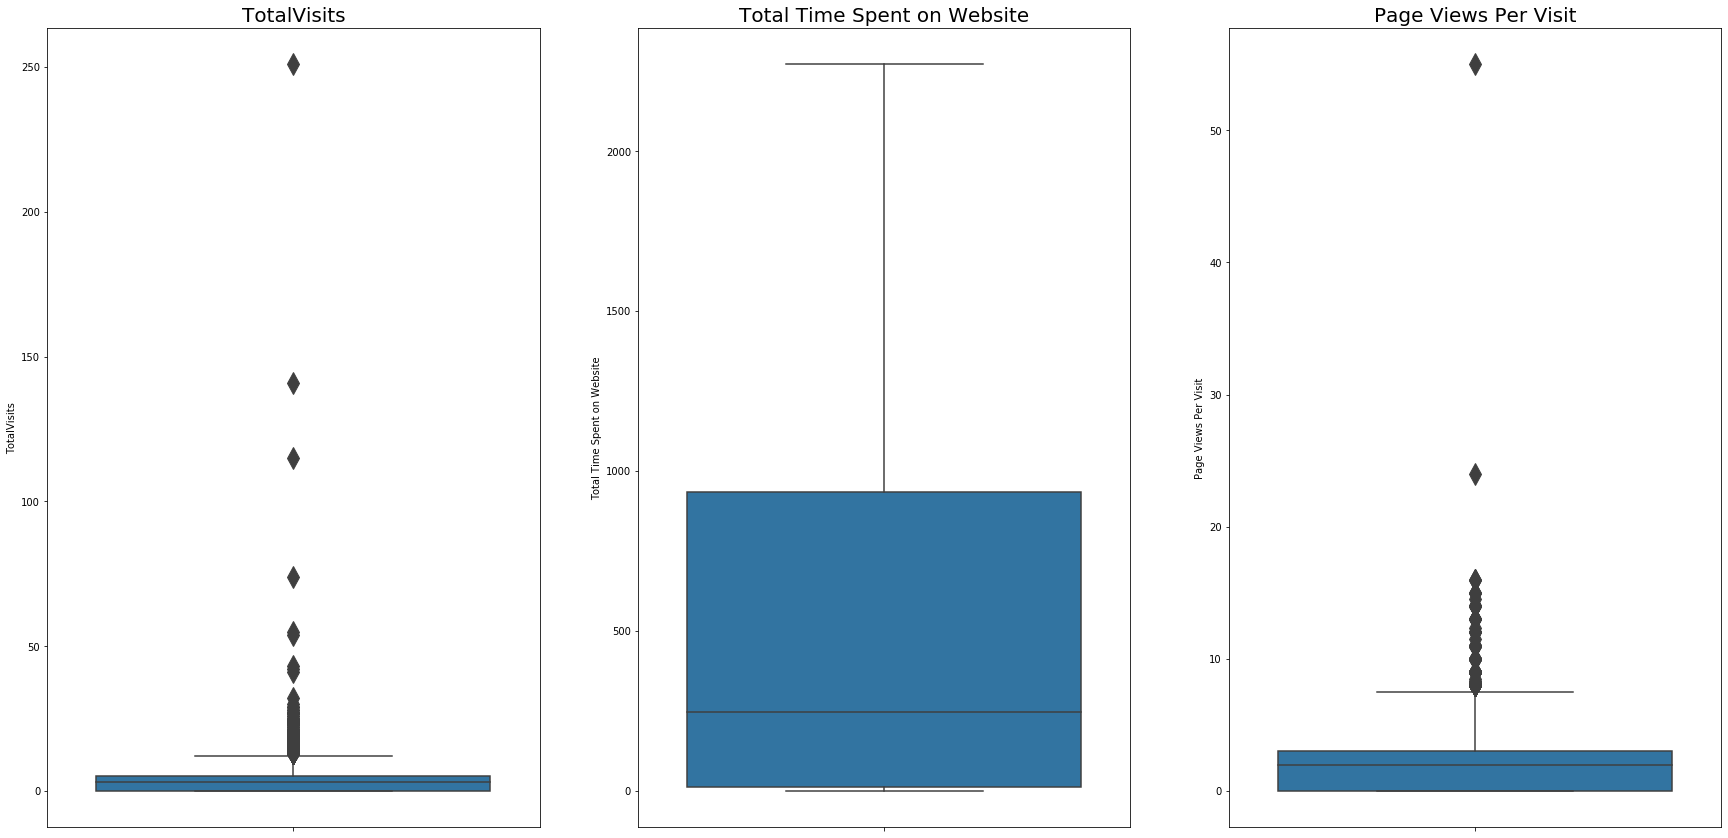

In [31]:
# Title names for the columns in the dataset

plt.figure(figsize=(30,50))
col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=df[col[i]],data=df,orient='v',fliersize=15)  # using boxplot
        

  

We will Treat the outliers and remove the extreme top values. We may need to do this to ensure that our scaling is done properly later while preparing the data for the model

In [32]:
df[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0,0.25,0.5,0.75,0.8,0.9,0.95,0.99,1])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.394156,2.327787
std,4.836682,2.164258
min,0.000000,0.000000
0%,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
80%,5.000000,4.000000
90%,7.000000,5.000000


In [33]:
soft = ['TotalVisits','Page Views Per Visit']

for i in soft:
    q1 = df[i].quantile(0.01)
    q4 = df[i].quantile(0.99)
    df = df[(df[i]>=q1) &(df[i]<=q4)]

In [34]:
df[['TotalVisits','Page Views Per Visit']].describe(percentiles=[0,0.25,0.5,0.75,0.8,0.9,0.95,0.99,1])

,TotalVisits,Page Views Per Visit
count,9090.000000,9090.000000
mean,3.095710,2.232693
std,2.907166,1.901055
min,0.000000,0.000000
0%,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,2.000000
75%,4.000000,3.000000
80%,5.000000,4.000000
90%,7.000000,5.000000


# Data Preparation - Model Building

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Separating target varaible from dependent variable

y=df['Converted']     

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
X=df.drop('Converted',1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Standardization

In [39]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  

In [40]:
# Now, Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset

X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
302,0,0,1.340545,-0.428736,0.059262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6087,1,0,-1.070195,-0.887355,-1.178546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1033,0,0,0.651762,-0.025151,1.477695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7656,1,0,0.996153,-0.241619,2.008943,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3241,0,0,0.307371,0.897591,-0.471986,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
# Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.448844884488445

### Correlation of the dataset

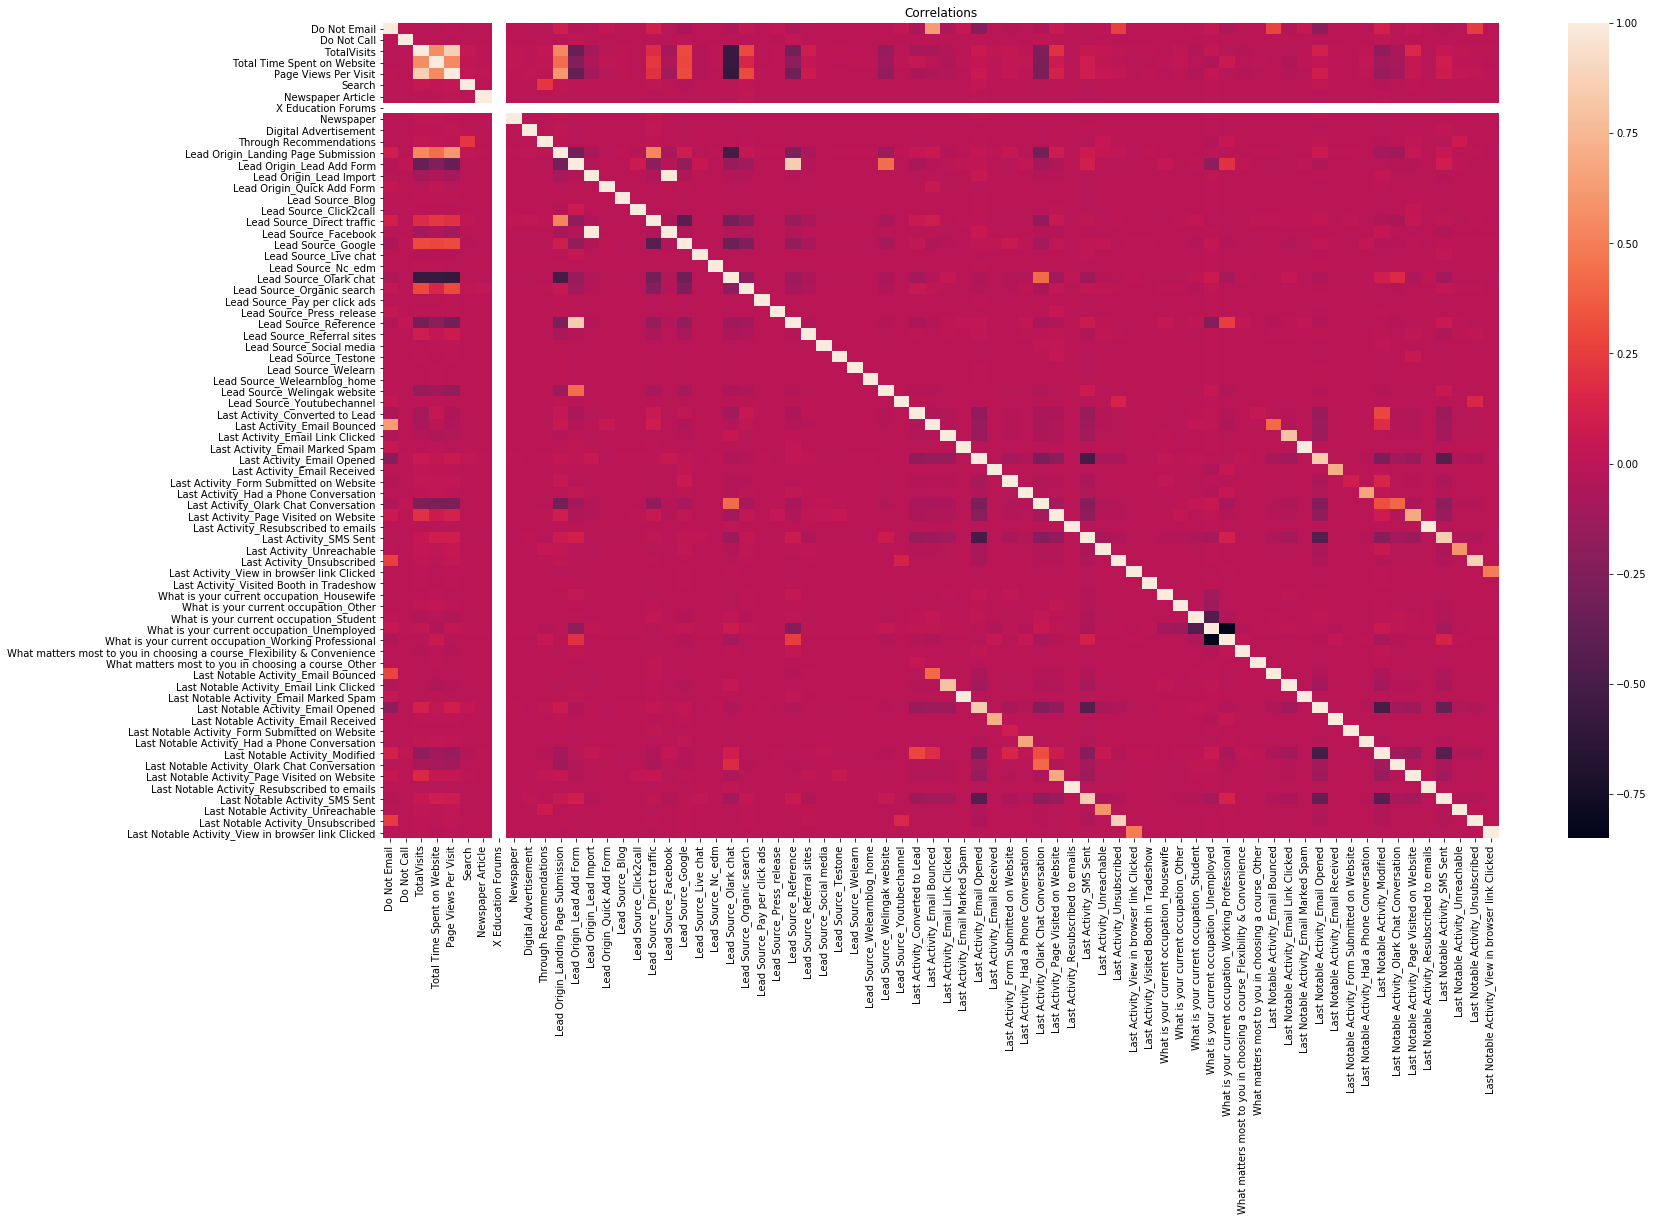

In [42]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(df[X_train.columns].corr(method='spearman'))

plt.show()

Based on the Graph we will take a deeper look on these later.

**Dropping highly correlated dummy variable/categories**

In [43]:
corr_dummy=['Lead Source_Olark chat','What is your current occupation_Unemployed']

X_train=X_train.drop(corr_dummy,1)      # dropping from X train set

X_test=X_test.drop(corr_dummy,1)       # dropping from X test set

## Building a Model

We will now proceed with building our model based on the p-values and VIFs

In [44]:
import statsmodels.api as sm
logis=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Dec 2020   Deviance:                          nan
Time:                        17:47:10   Pearson chi2:                 7.53e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    6.196e+15   6.72e+07   9.22e+07      0.000     6.2e+15     6.2e+15
Do Not Email                                                            -6.928e+14   4.45e+06  -1.56e+08      0.000   -6.93e+14   -6.93e+14
Do Not Call                                                              2.821e+15   4.76e+07   5.93e+07      0.000    2.82e+15    2.82e+15
TotalVisits                                                             -7.225e+13   1.32e+06  -5.49e+07      0.000   -7.22e+13   -7.22e+13
Total Time Spent on Website                                              -3.27e+13   9.59e+05  -3.41e+07      0.000   -3.27e+13   -3.27e+13
Page Views Per Visit                                                     5.805e+13   1.44e+06   4.02e+07      0.000    5.81e+13    5.81e+13
Search                                                                   1.127e+15   2.75e+07    4.1e+07      0.000    1.13e+15    1.13e+15
Newspaper Article                                                        4.031e+16   6.73e+07   5.99e+08      0.000    4.03e+16    4.03e+16
X Education Forums                                                       -405.0190   1.26e-06  -3.22e+08      0.000    -405.019    -405.019
Newspaper                                                                3.652e+14   6.72e+07   5.43e+06      0.000    3.65e+14    3.65e+14
Digital Advertisement                                                   -4.032e+13   3.88e+07  -1.04e+06      0.000   -4.03e+13   -4.03e+13
Through Recommendations                                                  1.926e+15   3.92e+07   4.91e+07      0.000    1.93e+15    1.93e+15
Lead Origin_Landing Page Submission                                      1.264e+12   2.58e+06   4.89e+05      0.000    1.26e+12    1.26e+12
Lead Origin_Lead Add Form                                                5.362e+14   1.47e+07   3.66e+07      0.000    5.36e+14    5.36e+14
Lead Origin_Lead Import                                                  1.246e+16   6.84e+07   1.82e+08      0.000    1.25e+16    1.25e+16
Lead Origin_Quick Add Form                                               1.433e+16   6.74e+07   2.13e+08      0.000    1.43e+16    1.43e+16
Lead Source_Blog                                                          -29.2442   3.37e-07  -8.68e+07      0.000     -29.244     -29.244
Lead Source_Click2call                                                   2.435e+15      5e+07   4.87e+07      0.000    2.43e+15    2.43e+15
Lead Source_Direct traffic                                              -8.066e+14   3.85e+06  -2.09e+08      0.000   -8.07e+14   -8.07e+14
Lea

There are so many variable with insignificant p-values. Here we will use rfe for feature selection as we have 70 variables.

### RFE

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression()                 # creating an object## Running RFE with two different variables count to find best model

## Running RFE with 19 Variables

### RFE Test

In [46]:
# Running rfe for 19 variables

rfem = RFE(logreg,19)

rfem = rfem.fit(X_train,y_train)   # fitting 

In [47]:
rfem.support_  # checking for ture and false assigned to the variables after rfe

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False])

In [48]:
# selecting columns only which are 'True' in rfem.support_ 
col=X_train.columns[rfem.support_]
X_train_1=sm.add_constant(X_train[col])    # Adding constant

In [49]:
logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.1
Date:                Mon, 07 Dec 2020   Deviance:                       5238.2
Time:                        17:47:14   Pearson chi2:                 6.95e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3074      0.090     -3.424      0.001      -0.483      -0.131
Do Not Email                                            -1.3703      0.201     -6.831      0.000      -1.763      -0.977
Total Time Spent on Website                              1.0846      0.040     27.260      0.000       1.007       1.163
Lead Origin_Lead Add Form                                2.6404      0.202     13.097      0.000       2.245       3.036
Lead Source_Direct traffic                              -1.2927      0.116    -11.141      0.000      -1.520      -1.065
Lead Source_Facebook                                    -1.2413      0.526     -2.359      0.018      -2.273      -0.210
Lead Source_Google                                      -0.8971      0.109     -8.246      0.000      -1.110      -0.684
Lead Source_Organic search                              -1.1812      0.136     -8.657      0.000      -1.449      -0.914
Lead Source_Referral sites                              -0.9853      0.331     -2.979      0.003      -1.634      -0.337
Lead Source_Welingak website                             2.9007      1.033      2.808      0.005       0.876       4.926
Last Activity_Converted to Lead                         -1.0999      0.208     -5.295      0.000      -1.507      -0.693
Last Activity_Email Bounced                             -0.9366      0.386     -2.428      0.015      -1.693      -0.180
Last Activity_Olark Chat Conversation                   -1.4257      0.160     -8.937      0.000      -1.738      -1.113
What is your current occupation_Housewife               24.0659   2.32e+04      0.001      0.999   -4.54e+04    4.55e+04
What is your current occupation_Other                    1.1077      0.720      1.539      0.124      -0.303       2.518
What is your current occupation_Working Professional     2.8054      0.189     14.879      0.000       2.436       3.175
Last Notable Activity_Had a Phone Conversation          24.4377   2.36e+04      0.001      0.999   -4.62e+04    4.63e+04
Last Notable Activity_SMS Sent                           1.6077      0.081     19.730      0.000       1.448       1.767
Last Notable Activity_Unreachable                        2.0113      0.611      3.291      0.001       0.814       3.209
Last Notable Activity_Unsubscribed                       1.4288      0.485      2.949      0.003       0.479       2.378
========================================================================================================================
"""

Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

## Calculating VIF

In [50]:
# importing VIFs library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Creating vif dataframe

vif=pd.DataFrame()

vif['Features']=X_train_1[col].columns  

# Caculating VIFs

vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif   

,Features,VIF
0,Do Not Email,1.99
10,Last Activity_Email Bounced,1.78
2,Lead Origin_Lead Add Form,1.46
16,Last Notable Activity_SMS Sent,1.38
8,Lead Source_Welingak website,1.29
3,Lead Source_Direct traffic,1.26
5,Lead Source_Google,1.24
14,What is your current occupation_Working Professional,1.18
1,Total Time Spent on Website,1.15
18,Last Notable Activity_Unsubscribed,1.13


**As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.**

In [52]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

In [53]:
# Creating a new model

X_train_2=sm.add_constant(X_train_2)                              
logis2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial())  
reg2=logis2.fit()                                                 
reg2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.5
Date:                Mon, 07 Dec 2020   Deviance:                       5252.9
Time:                        17:47:15   Pearson chi2:                 6.97e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3039      0.090     -3.387      0.001      -0.480      -0.128
Do Not Email                                            -1.3739      0.201     -6.849      0.000      -1.767      -0.981
Total Time Spent on Website                              1.0842      0.040     27.284      0.000       1.006       1.162
Lead Origin_Lead Add Form                                2.6589      0.201     13.210      0.000       2.264       3.053
Lead Source_Direct traffic                              -1.2893      0.116    -11.124      0.000      -1.517      -1.062
Lead Source_Facebook                                    -1.2435      0.526     -2.364      0.018      -2.275      -0.212
Lead Source_Google                                      -0.8923      0.109     -8.211      0.000      -1.105      -0.679
Lead Source_Organic search                              -1.1678      0.136     -8.579      0.000      -1.435      -0.901
Lead Source_Referral sites                              -0.9868      0.331     -2.984      0.003      -1.635      -0.339
Lead Source_Welingak website                             2.8813      1.033      2.789      0.005       0.856       4.906
Last Activity_Converted to Lead                         -1.1081      0.208     -5.337      0.000      -1.515      -0.701
Last Activity_Email Bounced                             -0.9422      0.386     -2.442      0.015      -1.699      -0.186
Last Activity_Olark Chat Conversation                   -1.4311      0.159     -8.973      0.000      -1.744      -1.118
What is your current occupation_Other                    1.0996      0.720      1.528      0.126      -0.311       2.510
What is your current occupation_Working Professional     2.7998      0.189     14.848      0.000       2.430       3.169
Last Notable Activity_Had a Phone Conversation          23.4290   1.43e+04      0.002      0.999    -2.8e+04    2.81e+04
Last Notable Activity_SMS Sent                           1.5994      0.081     19.646      0.000       1.440       1.759
Last Notable Activity_Unreachable                        2.0018      0.611      3.276      0.001       0.804       3.199
Last Notable Activity_Unsubscribed                       1.4223      0.485      2.935      0.003       0.472       2.372
========================================================================================================================
"""

Again, we can see from above summary that variable **'Last Activity_Email Bounced'** is in-significant hence dropping it and recreating a new model

In [54]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

X_train_3=X_train_2.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [55]:
# Recreating a new model

X_train_3=sm.add_constant(X_train_3)                              
logis3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial())  
reg3=logis3.fit()                                                 
reg3.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.2
Date:                Mon, 07 Dec 2020   Deviance:                       5270.3
Time:                        17:47:15   Pearson chi2:                 6.98e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3009      0.090     -3.358      0.001      -0.476      -0.125
Do Not Email                                            -1.3765      0.200     -6.867      0.000      -1.769      -0.984
Total Time Spent on Website                              1.0826      0.040     27.313      0.000       1.005       1.160
Lead Origin_Lead Add Form                                2.6559      0.201     13.200      0.000       2.262       3.050
Lead Source_Direct traffic                              -1.2838      0.116    -11.098      0.000      -1.511      -1.057
Lead Source_Facebook                                    -1.2452      0.526     -2.369      0.018      -2.276      -0.215
Lead Source_Google                                      -0.8821      0.108     -8.136      0.000      -1.095      -0.670
Lead Source_Organic search                              -1.1601      0.136     -8.542      0.000      -1.426      -0.894
Lead Source_Referral sites                              -0.9872      0.330     -2.987      0.003      -1.635      -0.340
Lead Source_Welingak website                             2.8825      1.033      2.790      0.005       0.858       4.907
Last Activity_Converted to Lead                         -1.1171      0.208     -5.383      0.000      -1.524      -0.710
Last Activity_Email Bounced                             -0.9469      0.386     -2.455      0.014      -1.703      -0.191
Last Activity_Olark Chat Conversation                   -1.4372      0.159     -9.015      0.000      -1.750      -1.125
What is your current occupation_Other                    1.0929      0.720      1.519      0.129      -0.318       2.503
What is your current occupation_Working Professional     2.7937      0.189     14.817      0.000       2.424       3.163
Last Notable Activity_SMS Sent                           1.5904      0.081     19.560      0.000       1.431       1.750
Last Notable Activity_Unreachable                        1.9921      0.611      3.260      0.001       0.795       3.190
Last Notable Activity_Unsubscribed                       1.4156      0.484      2.923      0.003       0.466       2.365
========================================================================================================================
"""

In [56]:
X_train_4=X_train_3.drop(['const','What is your current occupation_Other'],1)

In [57]:
# Recreating a new model

X_train_4=sm.add_constant(X_train_4)                              
logis4=sm.GLM(y_train,X_train_4,family=sm.families.Binomial()) 
reg4=logis4.fit()                                                 
reg4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.3
Date:                Mon, 07 Dec 2020   Deviance:                       5272.7
Time:                        17:47:15   Pearson chi2:                 6.98e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2975      0.090     -3.322      0.001      -0.473      -0.122
Do Not Email                                            -1.3679      0.200     -6.838      0.000      -1.760      -0.976
Total Time Spent on Website                              1.0841      0.040     27.351      0.000       1.006       1.162
Lead Origin_Lead Add Form                                2.6577      0.201     13.212      0.000       2.263       3.052
Lead Source_Direct traffic                              -1.2823      0.116    -11.088      0.000      -1.509      -1.056
Lead Source_Facebook                                    -1.2473      0.526     -2.372      0.018      -2.278      -0.217
Lead Source_Google                                      -0.8835      0.108     -8.150      0.000      -1.096      -0.671
Lead Source_Organic search                              -1.1590      0.136     -8.531      0.000      -1.425      -0.893
Lead Source_Referral sites                              -0.9904      0.330     -2.997      0.003      -1.638      -0.343
Lead Source_Welingak website                             2.8783      1.033      2.786      0.005       0.853       4.903
Last Activity_Converted to Lead                         -1.1212      0.208     -5.403      0.000      -1.528      -0.714
Last Activity_Email Bounced                             -0.9586      0.385     -2.487      0.013      -1.714      -0.203
Last Activity_Olark Chat Conversation                   -1.4359      0.159     -9.008      0.000      -1.748      -1.123
What is your current occupation_Working Professional     2.7909      0.189     14.804      0.000       2.421       3.160
Last Notable Activity_SMS Sent                           1.5863      0.081     19.523      0.000       1.427       1.746
Last Notable Activity_Unreachable                        1.9889      0.611      3.256      0.001       0.792       3.186
Last Notable Activity_Unsubscribed                       1.4033      0.484      2.898      0.004       0.454       2.352
========================================================================================================================
"""

## Final VIF

In [58]:
# Checking VIF again just to be sure

X_train_4_1=X_train_4.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_4_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   

,Features,VIF
0,Do Not Email,1.99
10,Last Activity_Email Bounced,1.78
2,Lead Origin_Lead Add Form,1.46
13,Last Notable Activity_SMS Sent,1.38
8,Lead Source_Welingak website,1.29
3,Lead Source_Direct traffic,1.26
5,Lead Source_Google,1.24
12,What is your current occupation_Working Professional,1.18
1,Total Time Spent on Website,1.15
6,Lead Source_Organic search,1.13


## Pedicting the Model

In [59]:
# Predicting the train dataset with our final model

y_train_pred=reg4.predict(X_train_4)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
302,0,0.147709,302
6087,0,0.026962,6087
1033,0,0.230003,1033
7656,0,0.164743,7656
3241,1,0.727021,3241


## ROC Curve Plotting

In [60]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def roc( real, probability ):
  
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    plt.figure(figsize=(8, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    plt.plot([0, 1], [0, 1], 'r--')   
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None  

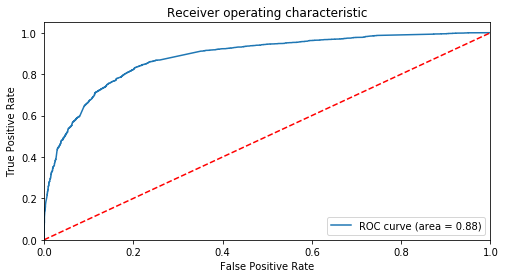

In [61]:
roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

## - The curve is closer to the left corner so our model has great accuracy.
## - The area under the curve is 88% of the total area.

#### Finding optimal probability cutoff point

In [62]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)] 
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)  
y_train_pred_final.head()   

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.147709,302,1,1,0,0,0,0,0,0,0,0
6087,0,0.026962,6087,1,0,0,0,0,0,0,0,0,0
1033,0,0.230003,1033,1,1,1,0,0,0,0,0,0,0
7656,0,0.164743,7656,1,1,0,0,0,0,0,0,0,0
3241,1,0.727021,3241,1,1,1,1,1,1,1,1,0,0


## Confusion Matrix

In [63]:
# Calculating accuracy, sensitivity and specificity with probability cutoffs

from sklearn.metrics import confusion_matrix
df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])   
    total=sum(sum(cm_matrix))                                                          
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs) 

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381581    1.000000     0.000000
0.1          0.1  0.589659    0.967463     0.356544
0.2          0.2  0.739431    0.914745     0.631258
0.3          0.3  0.805752    0.839374     0.785006
0.4          0.4  0.814081    0.774300     0.838628
0.5          0.5  0.818168    0.707166     0.886658
0.6          0.6  0.797423    0.586079     0.927827
0.7          0.7  0.782178    0.508649     0.950953
0.8          0.8  0.765834    0.433690     0.970775
0.9          0.9  0.717115    0.277183     0.988564


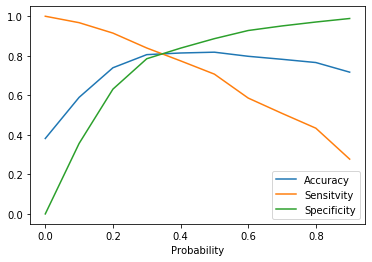

In [64]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

### From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is **0.40**. Also we can see that there is a trade off between sensitivity and specificity.

In [65]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
302,0,0.147709,302,1,1,0,0,0,0,0,0,0,0,0
6087,0,0.026962,6087,1,0,0,0,0,0,0,0,0,0,0
1033,0,0.230003,1033,1,1,1,0,0,0,0,0,0,0,0
7656,0,0.164743,7656,1,1,0,0,0,0,0,0,0,0,0
3241,1,0.727021,3241,1,1,1,1,1,1,1,1,0,0,1


## Precision and Recall

Let's create precision and recall using confusion matrix

In [66]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3300,  635],
       [ 548, 1880]], dtype=int64)

In [67]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7475149105367793
Recall 0.7742998352553542


**-- Our precison percentage is 73% approximately and recall  percentage is 79%**

**-- This means we have very good model which explains relevancy of 73% and true relevant results about 79%.**

**As per our business objective, the recall percentage is more valuable because it is okay if our precision is little low which means less hot lead customers.
But we don't want to miss out on any hot leads which are willing to get converted, hence our focus will be more on Recall than Precision.**

### Precision and Recall trade-off

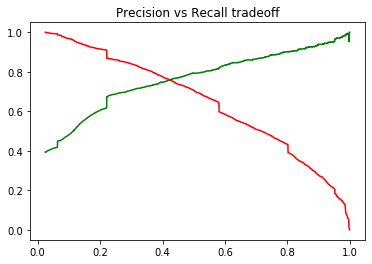

In [68]:
from sklearn.metrics import precision_recall_curve
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

**As we can see that there is a trade off between Precision and Recall and the meeting point is between at 0.4 and 0.5**

## Prediction on the test dataset

#### Scaling the test dataset

In [69]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

#X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

## Perdicting

In [70]:
# Predicting the test dataset with our final model

test_cols=X_train_4.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg4.predict(X_test_final)       # Predicting the final test set

In [71]:
# Creating a new dataset and saving the prediction values in it
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,ID
6906,1,0.889661,6906
1873,0,0.145158,1873
771,0,0.114503,771
4495,0,0.135097,4495
9061,1,0.733810,9061


### Model Evaluation

In [72]:
# Predicting outcomes with probability cutoff as 0.4 

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
6906,1,0.889661,6906,1
1873,0,0.145158,1873,0
771,0,0.114503,771,0
4495,0,0.135097,4495,0
9061,1,0.733810,9061,1


In [73]:
# Checking the accuracy of the test dataset.

from sklearn import metrics   
print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))  

Accuracy score in predicting test dataset : 0.8056472313898057


In [74]:
from sklearn.metrics import precision_score, recall_score    
print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)) 
print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))  

Precision score in predicting test dataset: 0.7443130118289354
Recall score in predicting test dataset: 0.7666354264292409


#### Final dataframe with all the Lead Scores

In [75]:
y_test_pred_final

,Converted,Converted_Probability,ID,Predicted
6906,1,0.889661,6906,1
1873,0,0.145158,1873,0
771,0,0.114503,771,0
4495,0,0.135097,4495,0
9061,1,0.733810,9061,1
...,...,...,...,...
1939,0,0.184252,1939,0
1540,1,0.333964,1540,0
5198,1,0.154908,5198,0
8660,0,0.063244,8660,0


In [76]:
#y_test_pred_final['Lead Number']=df.iloc[y_test_pred_final['ID'],1]
y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Score
6906,1,0.889661,6906,1,89
1873,0,0.145158,1873,0,15
771,0,0.114503,771,0,11
4495,0,0.135097,4495,0,14
9061,1,0.733810,9061,1,73


In [77]:
# Confusion matrix For this test data
confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])
print(confusion)

[[1379  281]
 [ 249  818]]


In [78]:
# Creating a function that will return metrics and score
def confscores(conf):
    TP = conf[1,1] # true positive 
    TN = conf[0,0] # true negatives
    FP = conf[0,1] # false positives
    FN = conf[1,0] # false negatives
    
    sensitivity = TP/float(TP+FN)
    specificity = TN/float(TN+FP)
    precision = TP/float(TP+FP)
    accuracy = float(TP+TN)/float(TP+FP+TN+FN)
    
    print("Accuracy: ", round(accuracy,4))
    print("Sensitivity: ", round(sensitivity,4))
    print("Specificity: ", round(specificity,4))
    print("Precision: ", round(precision,4))

In [79]:
confscores(confusion)

Accuracy:  0.8056
Sensitivity:  0.7666
Specificity:  0.8307
Precision:  0.7443


#### Find Important Features

In [80]:
df.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.004308,-0.133269,-0.016344,-0.046930,0.015380,-0.010990,-0.003046,NaN,-0.003046,-0.005277,-0.007464,0.092187,-0.019455,-0.017362,0.036119,-0.003046,-0.006093,0.104545,-0.017362,-0.058965,-0.004308,-0.003046,-0.049292,0.035460,-0.003046,0.036119,-0.037512,-0.011297,-0.004308,-0.003046,-0.003046,-0.003046,-0.000147,0.036119,-0.062615,0.628773,-0.042888,0.051082,-0.221820,-0.004308,-0.021655,-0.009145,-0.053571,0.061165,-0.003046,-0.013963,0.007931,0.265469,-0.006093,-0.003046,-0.009638,-0.000931,0.007985,0.042639,-0.051011,-0.004308,-0.003046,0.278322,-0.037059,0.051082,-0.186084,-0.003046,-0.003046,-0.010990,0.117926,-0.012186,0.034239,-0.003046,-0.022913,-0.010326,0.245578,-0.003046
Do Not Call,-0.004308,1.000000,0.018770,0.007166,0.006961,-0.005718,-0.000561,-0.000156,NaN,-0.000156,-0.000270,-0.000381,-0.015585,0.023177,-0.001157,-0.000156,-0.000156,-0.000311,-0.009135,-0.001157,0.005853,-0.000220,-0.000156,-0.007251,-0.005482,-0.000156,-0.000156,0.027869,-0.001694,-0.000220,-0.000156,-0.000156,-0.000156,-0.001869,-0.000156,-0.003298,-0.002852,-0.002566,-0.000220,0.003530,-0.000220,-0.001672,-0.000839,0.018939,-0.003923,-0.000156,-0.009661,-0.001492,-0.001209,-0.000311,-0.000156,-0.000492,-0.000583,-0.002265,0.005014,-0.004265,-0.000220,-0.000156,-0.001199,-0.002048,-0.000220,-0.009870,-0.000156,-0.000156,-0.000561,0.019368,-0.002120,-0.002683,-0.000156,-0.008239,-0.000882,-0.001058,-0.000156
Converted,-0.133269,0.018770,1.000000,0.031933,0.360298,-0.018763,0.000010,0.013271,NaN,-0.008290,-0.001911,0.023712,-0.052359,0.324947,-0.023757,0.013271,-0.008290,0.015765,-0.078932,-0.023757,0.026657,0.018770,0.013271,-0.130116,-0.012424,-0.008290,-0.008290,0.273425,-0.032070,0.003522,-0.008290,0.013271,-0.008290,0

In [81]:
pd.options.display.float_format = '{:.2f}'.format
new_params = logis4.fit().params[1:]
new_params

Do Not Email                                           -1.37
Total Time Spent on Website                             1.08
Lead Origin_Lead Add Form                               2.66
Lead Source_Direct traffic                             -1.28
Lead Source_Facebook                                   -1.25
Lead Source_Google                                     -0.88
Lead Source_Organic search                             -1.16
Lead Source_Referral sites                             -0.99
Lead Source_Welingak website                            2.88
Last Activity_Converted to Lead                        -1.12
Last Activity_Email Bounced                            -0.96
Last Activity_Olark Chat Conversation                  -1.44
What is your current occupation_Working Professional    2.79
Last Notable Activity_SMS Sent                          1.59
Last Notable Activity_Unreachable                       1.99
Last Notable Activity_Unsubscribed                      1.40
dtype: float64

In [82]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -47.52
Total Time Spent on Website                             37.66
Lead Origin_Lead Add Form                               92.33
Lead Source_Direct traffic                             -44.55
Lead Source_Facebook                                   -43.33
Lead Source_Google                                     -30.69
Lead Source_Organic search                             -40.27
Lead Source_Referral sites                             -34.41
Lead Source_Welingak website                           100.00
Last Activity_Converted to Lead                        -38.95
Last Activity_Email Bounced                            -33.30
Last Activity_Olark Chat Conversation                  -49.89
What is your current occupation_Working Professional    96.96
Last Notable Activity_SMS Sent                          55.11
Last Notable Activity_Unreachable                       69.10
Last Notable Activity_Unsubscribed                      48.75
dtype: f

In [83]:
# Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')

# Conclusion

### 1. The Model we have built has an accuracy of over 80 %
### 2. The Recall for the model is more that the precesion which will help the business not miss out on any hot leads
### 3. All the Confusion matrix scores are above 75% which shows that our model is scalable for future data and very much acceptable
### 4. Below are the top features which may influence the conversion of leads

   


In [87]:
feature_importance_df = pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
feature_importance_df = feature_importance_df.rename(columns={'index':'Variables', 0:'Relative coeffient value'})
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head(5)

,Variables,Relative coeffient value
0,Lead Source_Welingak website,100.00
1,What is your current occupation_Working Professional,96.96
2,Lead Origin_Lead Add Form,92.33
3,Last Notable Activity_Unreachable,69.10
4,Last Notable Activity_SMS Sent,55.11
